In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os 
sys.path.append("../../")

In [37]:
from data_loading import load_runs

RUN = ["1","2","3","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]
rundata, mc_weights, data_pot = load_runs(
    RUN,
    data="two_shr_sideband",  # which data to load
    # truth_filtered_sets=["nue", "drt", "nc_pi0", "cc_pi0", "cc_nopi", "cc_cpi", "nc_nopi", "nc_cpi"],
    # Which truth-filtered MC sets to load in addition to the main MC set. At least nu_e and dirt
    # are highly recommended because the statistics at the final level of the selection are very low.
    truth_filtered_sets=["nue", "drt"],
    # Choose which additional variables to load. Which ones are required may depend on the selection
    # you wish to apply.
    loadpi0variables=True,
    loadshowervariables=True,
    loadrecoveryvars=True,
    loadsystematics=True,
    # Load the nu_e set one more time with the LEE weights applied
    load_lee=True,
    # With the cache enabled, by default the loaded dataframes will be stored as HDF5 files
    # in the 'cached_dataframes' folder. This will speed up subsequent loading of the same data.
    enable_cache=True,
    blinded=False,
)

get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 1
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run1/nuepresel/TwoShowers_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run1_C1.root
Dataset two_shr_sideband is a data or EXT file
is_mc= False
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
Loading lee sample
get_rundict: run_number= 1
get_rundict: run_number= 1
get_rundict: run_number= 1
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 2
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run2/nuepresel/TwoShowers_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run2.root
Dataset two_shr_sideband is a data or EXT file
is_mc= False
get_rundict: ru

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= True


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsFlux', 'weightsGenie'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 5
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 5
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run5/nuepresel/overlay_peleeTuple_uboone_v08_00_00_70_run5_dirt.root
is_mc= True
get_rundict: run_number= 5
Loading lee sample
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 5
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run5/nuepresel/run5_bnb_intrinsic_nue_overlay_pandora_unified_reco2_reco2_ana.root
is_mc= True
get_rundict: run_number= 5
get_rundict: run_number= 1
get_rundict: run_number= 5
The sideband data you're using had the following query applied:
n_showers_contained >= 2
I will also apply this query to the MC you're loading


(<AxesSubplot:title={'center':'1e0p Presel., 2+ shower and 1e0p BDT sel. 2+shr'}, ylabel='Events'>,
 <AxesSubplot:xlabel='neutrino reconstructed energy [GeV]', ylabel='Data/MC'>)

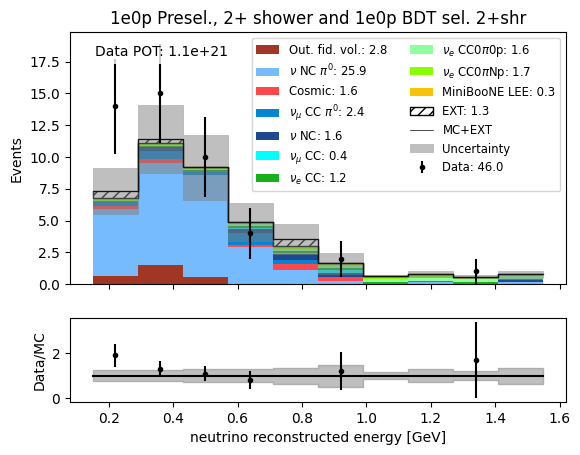

In [52]:
from microfit.histogram import Binning, Histogram, RunHistGenerator, MultiChannelBinning
from microfit.run_plotter import RunHistPlotter

sideband_binning = Binning.from_config("reco_e", 10, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator_ZPBDTTWOSHR = RunHistGenerator(
    rundata,
    sideband_binning,
    data_pot=data_pot,
    selection="ZPBDTTWOSHR",
    preselection="ZPTwoShr",
)
sideband_plotter = RunHistPlotter(sideband_generator_ZPBDTTWOSHR)
sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                      category_column="category")

In [41]:
RUN = ["3","4b","4c","4d","5"]  # this can be a list of several runs, i.e. [1,2,3]

rundata_numu, mc_weights_numu, data_pot_numu = load_runs(
    RUN,
    data="muon_sideband",
    truth_filtered_sets=["nue", "drt"],
    loadshowervariables=True,
    loadsystematics=True,
    use_bdt=False,
    # set this to true to let the data loading function know that we are loading numu
    numupresel=True,
    loadnumuvariables=True,
    load_crt_vars=True,
    blinded=False,  # sideband needs to be unblinded to work
    enable_cache=True,
)

get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/NuMuSideband_PostCRTFix_bnb_beam_on_peleeTuple_uboone_v08_00_00_70_run3.root
Dataset muon_sideband is a data or EXT file


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/PostCRTFix_bnb_beam_off_peleeTuple_uboone_v08_00_00_70_run3.root
is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nu.root


../../data_loading.py:786: RuntimeWarning: invalid value encountered in true_divide
  df["proton_pz"] = np.where((mc_E_prot > 0), mc_pz_prot / mc_p_prot, np.nan)


is_mc= False


/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/pandas/core/generic.py:2505: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block5_values] [items->Index(['weightsReint', 'weightsFlux', 'weightsGenie'], dtype='object')]

  encoding=encoding,


get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_nue.root
is_mc= False
get_rundict: run_number= 3
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 3
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run3/numupresel/overlay_peleeTuple_uboone_v08_00_00_70_run3_dirt.root
is_mc= False
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4b
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4b/numupresel/NuMuSideband_Run4b_bnb_beamOn_PeLee_ntuples_run4b_ana.root
Dataset muon_sideband is a data or EXT file
is_mc= Fal

/nashome/a/atrettin/miniforge3/envs/python3LEE/lib/python3.7/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


is_mc= False
get_rundict: run_number= 4d
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 4d
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run4d/numupresel/Run4d_BNB_dirt_overlay_Pandora_Unified_Reco2_reco2_ana.root
is_mc= False
get_rundict: run_number= 4d
get_rundict: run_number= 1
get_rundict: run_number= 4d
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 5
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/NuMuSideband_run5_bnb_beamon_PeLEE_ntuples_run5_ana.root
Dataset muon_sideband is a data or EXT file
is_mc= False
get_rundict: run_number= 5
Using data_paths.yml to locate ntuple file
get_rundict: run_number= 5
Loading ntuple file /uboone/data/users/cthorpe/PELEE_2023_Samples/run5/numupresel/Run5_bnb_beamOff_PeLee_ntuples_run5_ana_ana

In [42]:
for key in rundata_numu:
    rundata_numu[key]['npi'] = rundata_numu[key].eval('npion+npi0')

(0.0, 3349.4233167861294)

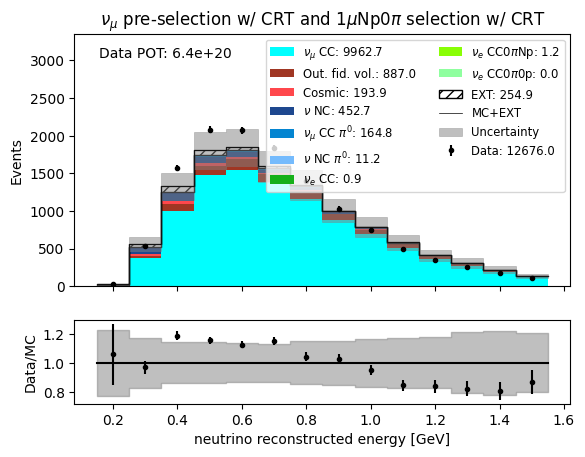

In [50]:
sideband_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator_NUMUCRTNP0PI = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRTNP0PI",
    preselection="NUMUCRT",
)
sideband_plotter = RunHistPlotter(sideband_generator_NUMUCRTNP0PI)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]
ax.set_ylim(0.0, ax.get_ylim()[1] * 1.5)

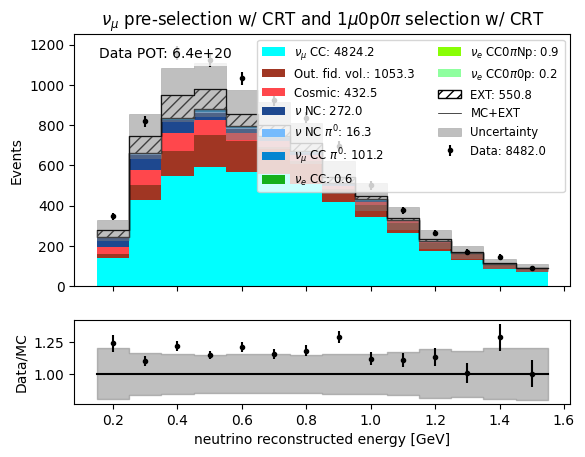

In [51]:
sideband_binning = Binning.from_config("neutrino_energy", 14, (0.15, 1.55), "neutrino reconstructed energy [GeV]")
sideband_generator_NUMUCRT0P0PI = RunHistGenerator(
    rundata_numu,
    sideband_binning,
    data_pot=data_pot_numu,
    selection="NUMUCRT0P0PI",
    preselection="NUMUCRT",
)
sideband_plotter = RunHistPlotter(sideband_generator_NUMUCRT0P0PI)
ax = sideband_plotter.plot(include_multisim_errors=True, show_data_mc_ratio=True, add_ext_error_floor=False,
                           category_column="category")[0]

In [53]:
from microfit.analysis import MultibandAnalysis

sideband_analysis = MultibandAnalysis(
    signal_generators = [sideband_generator_ZPBDTTWOSHR, sideband_generator_NUMUCRTNP0PI, sideband_generator_NUMUCRT0P0PI],
    signal_names=["ZPBDTTWOSHR", "NUMUCRTNP0PI", "NUMUCRT0P0PI"],
)

(<Figure size 2400x500 with 3 Axes>,
 array([[<AxesSubplot:title={'center':'1e0p Presel., 2+ shower and 1e0p BDT sel. 2+shr'}, xlabel='neutrino reconstructed energy [GeV]', ylabel='Events'>,
         <AxesSubplot:title={'center':'$\\nu_{\\mu}$ pre-selection w/ CRT and $1\\mu$Np0$\\pi$ selection w/ CRT'}, xlabel='neutrino reconstructed energy [GeV]', ylabel='Events'>,
         <AxesSubplot:title={'center':'$\\nu_{\\mu}$ pre-selection w/ CRT and $1\\mu$0p0$\\pi$ selection w/ CRT'}, xlabel='neutrino reconstructed energy [GeV]', ylabel='Events'>]],
       dtype=object))

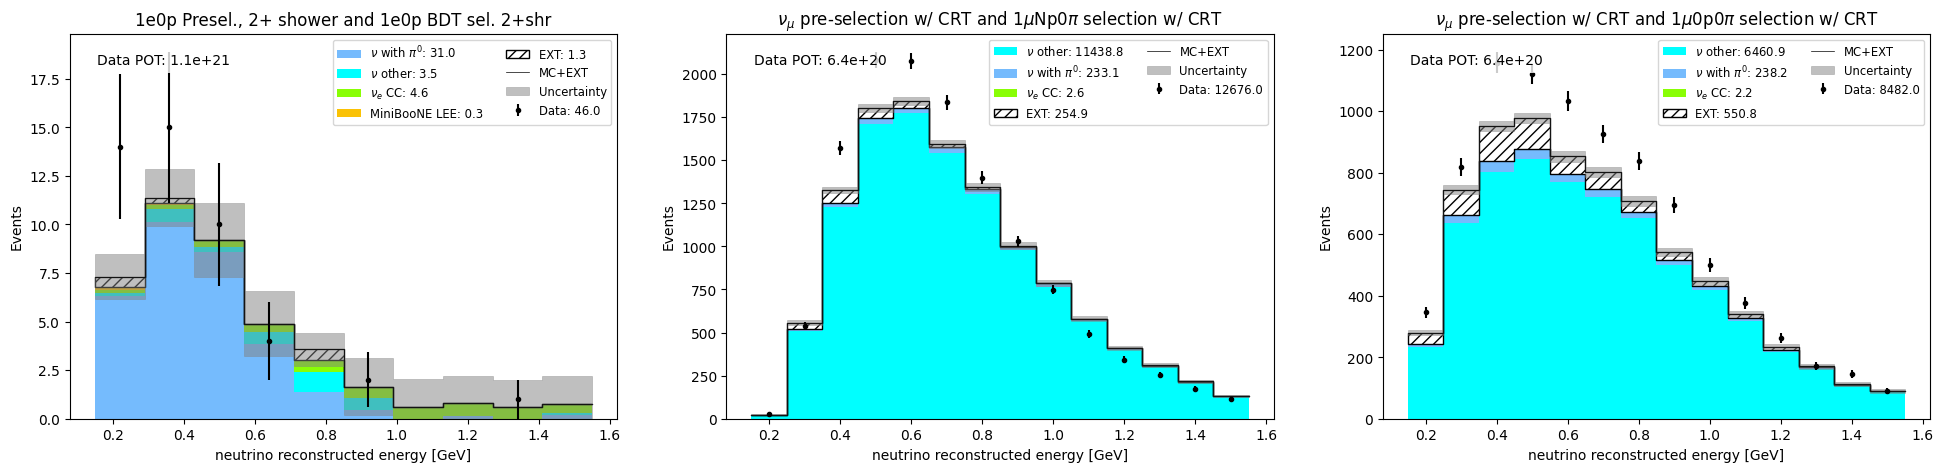

In [54]:
sideband_analysis.plot_signals()

(<Figure size 800x600 with 2 Axes>,
 <AxesSubplot:title={'center':'Multiband Correlation: weightsGenie'}>)

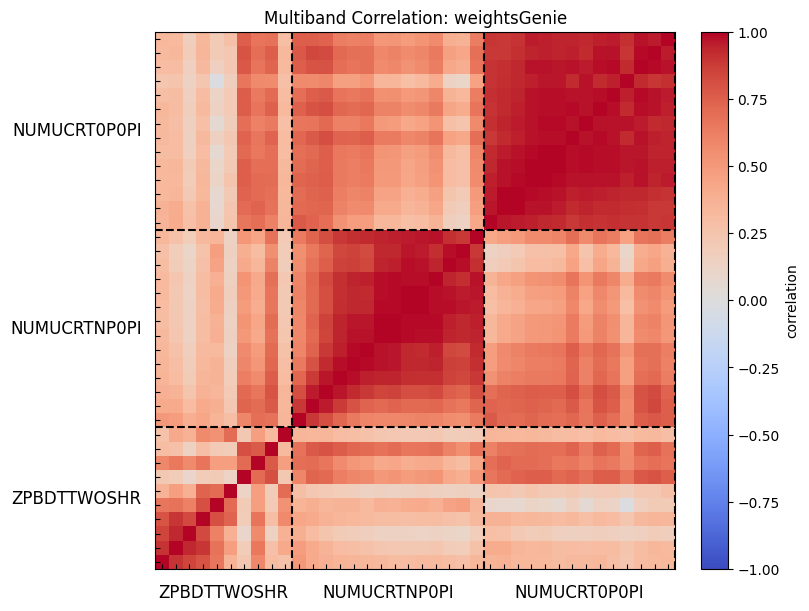

In [58]:
sideband_analysis.plot_correlation(ms_column="weightsGenie", with_unisim=True)

In [4]:
from microfit.histogram import Binning, Histogram, RunHistGenerator, MultiChannelBinning
from microfit.selections import get_selection_query, find_common_selection

# Binnings are defined by the variable to be binned, the number of bins, and the range, and the label.
binning_def = ("reco_e", 14, (0.15, 1.55), r"Reconstructed Energy [GeV]")
binning_np = Binning.from_config(*binning_def)
binning_np.selection_query = get_selection_query("NPBDT", "NP")
binning_np.label = "NP"

binning_def = ("reco_e", 10, (0.15, 1.55), r"Reconstructed Energy [GeV]")
binning_zp = Binning.from_config(*binning_def)
binning_zp.selection_query = get_selection_query("ZPBDT", "ZP")
binning_zp.label = "ZP"

multi_binning = MultiChannelBinning([binning_np, binning_zp])


In [5]:
multi_binning

MultiChannelBinning(binnings=[Binning(variable='reco_e', bin_edges=array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15,
       1.25, 1.35, 1.45, 1.55]), label='NP', variable_tex='Reconstructed Energy [GeV]', is_log=False, selection_query='nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and nslice == 1 and selected == 1 and shr_energy_tot_cali > 0.07 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) and n_tracks_contained > 0 and CosmicIPAll3D > 10. and trkpid < 0.02 and hits_ratio > 0.50 and shrmoliereavg < 9 and subcluster > 4 and trkfit < 0.65 and tksh_distance < 6.0 and (shr_tkfit_nhits_tot > 1 and shr_tkfit_dedx_max > 0.5 and shr_tkfit_dedx_max < 5.5) and tksh_angle > -0.9 and shr_trk_len < 300. and pi0_score > 0.67 and nonpi0_score > 0.70 and n_showers_contained == 1'), Binning(variable='reco_e

In [26]:
signal_generator = RunHistGenerator(
    rundata,
    multi_binning,
    # selection="NPBDT",
    # preselection="NP",
    enable_cache=True,
    data_pot=data_pot,
)

In [27]:
prediction = signal_generator.get_total_prediction(include_multisim_errors=True, smooth_ext_histogram=True)

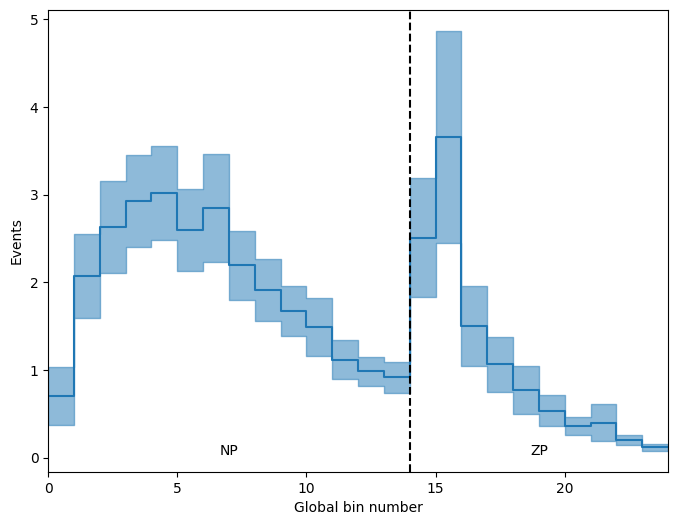

In [28]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))
ax = prediction.draw(ax=ax)


<AxesSubplot:title={'center':'Correlation matrix'}, xlabel='Global bin number', ylabel='Global bin number'>

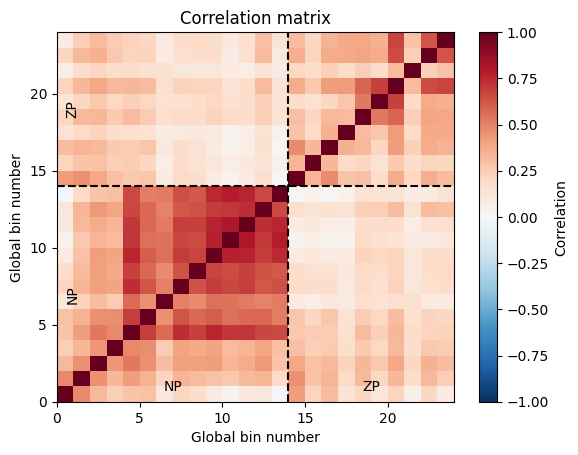

In [29]:
prediction.draw_covariance_matrix(as_fractional=False, as_correlation=True)

In [30]:
from microfit.run_plotter import RunHistPlotter

plotter = RunHistPlotter(signal_generator)

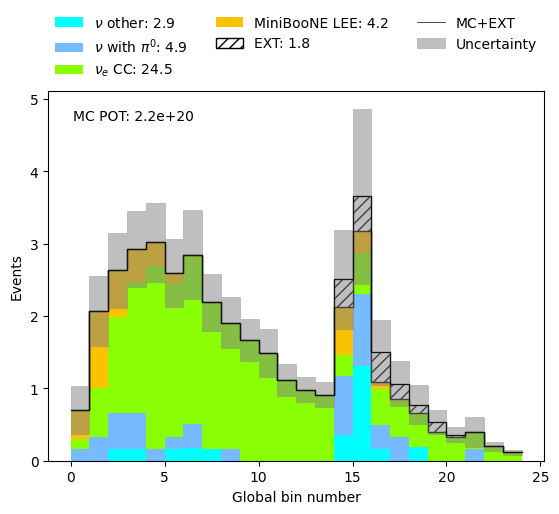

In [32]:
ax = plotter.plot(
    add_ext_error_floor=False,
    smooth_ext_histogram=True,
    include_multisim_errors=True,
    category_column="paper_category",
    # channel="ZP",
    title="",
)
# Add the legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=3, frameon=False)

# ax.set_title("test")

In [3]:
from microfit.analysis import MultibandAnalysis
import toml

analysis = MultibandAnalysis(toml.load("../../config_files/first_round_analysis_runs_1-5.toml"))

get_rundict: run_number= 1
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 3
get_rundict: run_number= 1
get_rundict: run_number= 3
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 4b
get_rundict: run_number= 1
get_rundict: run_number= 4b
The sideband data you're using had the following query applied:
n_muons_tot > 0
I will also apply this query to the MC you're loading
get_rundict: run_number= 1
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 4c
get_rundict: run_number= 1
get_rundict: run_number= 4c
The sideband data you're using had the following query applied:
n_muons_

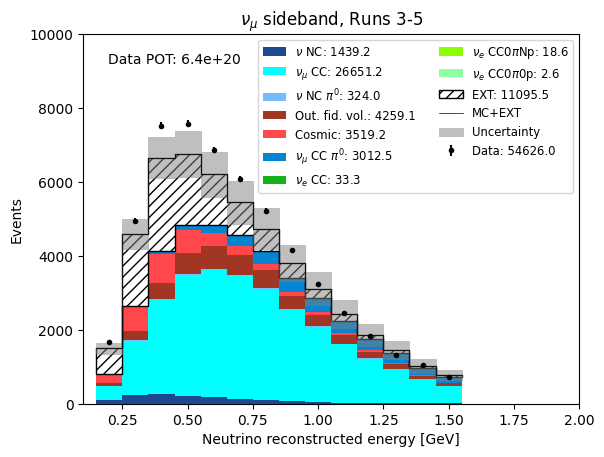

In [25]:
import matplotlib.pyplot as plt
ax = analysis.plot_sideband()
ax.set_ylim((0, 10000))
ax.set_xlim((0.1, 2))
ax.set_title(r"$\nu_\mu$ sideband, Runs 1-5")
plt.savefig("sideband_numu_runs_1-5.pdf")

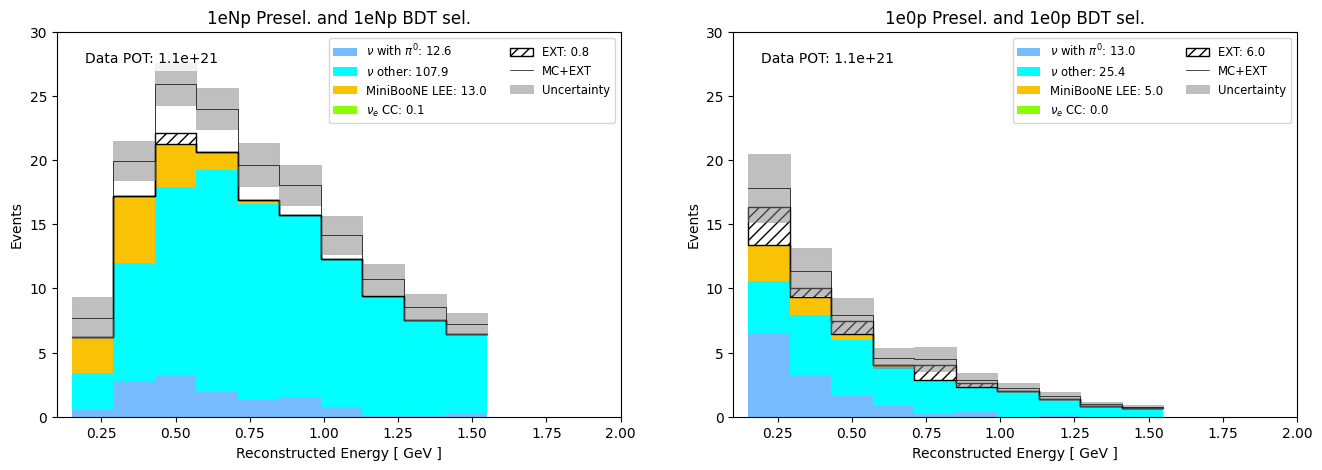

In [26]:
fig, axes = analysis.plot_signals()
for ax in axes.flatten():
    ax.set_xlim((0.1, 2))
    ax.set_ylim((0, 30))
fig.savefig("signals_runs_1-5_constrained.pdf")

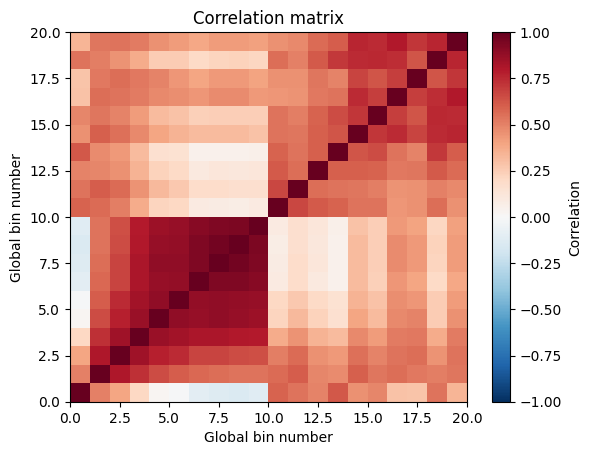

In [23]:
multiband_hist = analysis.generate_multiband_histogram(include_multisim_errors=True)
multiband_hist.draw_covariance_matrix(as_fractional=False, as_correlation=True)

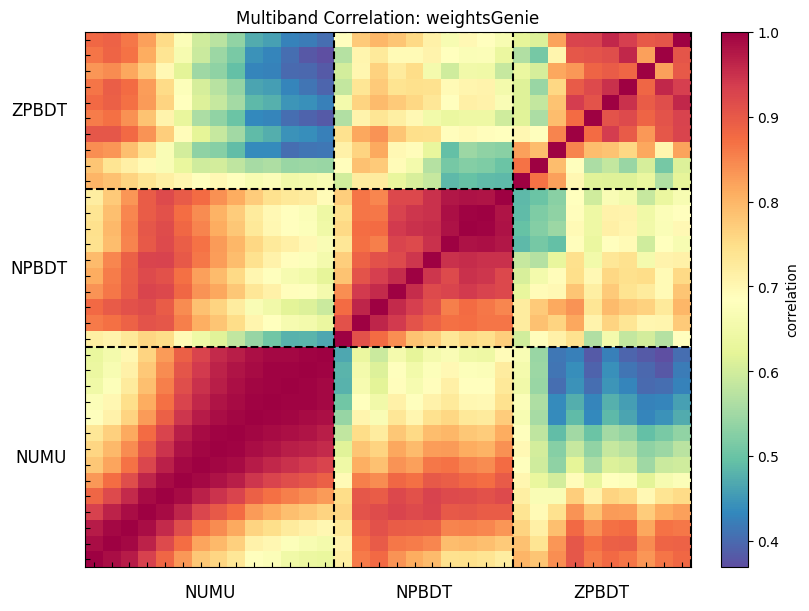

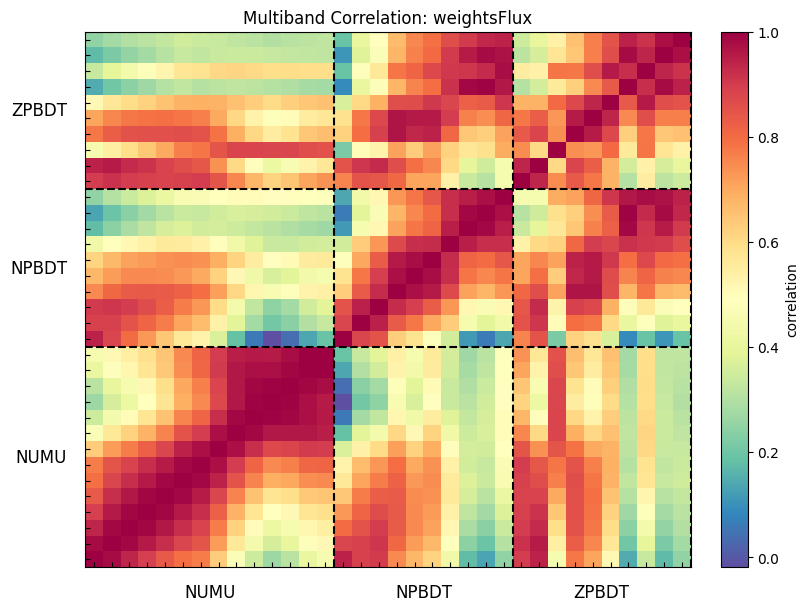

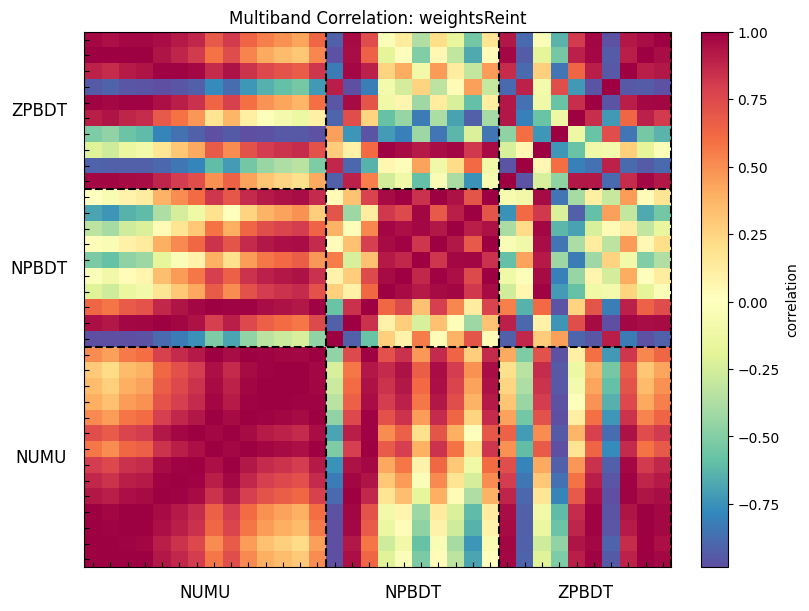

In [28]:
fig, ax = analysis.plot_correlation(ms_column="weightsGenie")
fig.savefig("multiband_correlation_runs_1-5_weightsGenie.pdf")

fig, ax = analysis.plot_correlation(ms_column="weightsFlux")
fig.savefig("multiband_correlation_runs_1-5_weightsFlux.pdf")

fig, ax = analysis.plot_correlation(ms_column="weightsReint")
fig.savefig("multiband_correlation_runs_1-5_weightsReint.pdf")